In [62]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader('PG', data_source = 'yahoo', start = '2007-1-1')['Adj Close']

In [5]:
data.head()

,PG
Date,
2007-01-03,46.849339
2007-01-04,46.493664
2007-01-05,46.094406
2007-01-08,46.196045
2007-01-09,46.079914


In [21]:
log_returns = np.log( 1 + data.pct_change()) # OR  np.log(data['PG'] / data['PG'].shift(1))

In [24]:
log_returns.tail()

,PG
Date,
2017-08-25,0.002598
2017-08-28,-0.000432
2017-08-29,-0.001623
2017-08-30,-0.004886
2017-08-31,0.002500


In [26]:
u = log_returns.mean()    # not multiplied by 250 because we are interested in daily mean
u

PG    0.000252
dtype: float64

In [28]:
std = log_returns.std()
std

PG    0.010981
dtype: float64

In [30]:
var = log_returns.var()
var

PG    0.000121
dtype: float64

In [31]:
drift = u - 0.5 * var
drift

PG    0.000191
dtype: float64

In [39]:
X = np.random.rand(10, 2)      # generate an array of random probabilities 
X

array([[ 0.47023094,  0.74269367],
       [ 0.76937101,  0.38960848],
       [ 0.24666556,  0.16066079],
       [ 0.52494808,  0.82978013],
       [ 0.9954651 ,  0.64913262],
       [ 0.29389145,  0.60342245],
       [ 0.57531153,  0.24919334],
       [ 0.50346117,  0.31951108],
       [ 0.72692308,  0.29423168],
       [ 0.66026902,  0.00300999]])

In [41]:
Z = norm.ppf(X)     # for every probability, this function gives a corresponding position of standard deviation
Z

array([[-0.07468936,  0.65167219],
       [ 0.73677697, -0.28033962],
       [-0.68502029, -0.99174574],
       [ 0.06257637,  0.95329675],
       [ 2.6094119 ,  0.38297977],
       [-0.54205167,  0.26221576],
       [ 0.18991347, -0.67703038],
       [ 0.00867599, -0.46906643],
       [ 0.6035335 , -0.54106417],
       [ 0.41319744, -2.74669128]])

In [44]:
t_intervals = 1000    # forecasting stock prices for the next 1000 days
iterations = 10    # ask the computer to produce 10 series of future stock price prediction

In [45]:
daily_returns = np.exp(drift.values + std.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[ 1.00398113,  1.01579548,  0.97917387, ...,  0.99104768,
         1.0178181 ,  1.01407629],
       [ 1.01666137,  1.01209712,  1.01898703, ...,  0.99377607,
         0.98686063,  1.00592069],
       [ 0.99678761,  1.00302874,  1.00636867, ...,  0.99751248,
         0.98426202,  0.99325586],
       ..., 
       [ 1.00498011,  0.9866239 ,  1.01020101, ...,  1.02064646,
         1.00570045,  0.99475483],
       [ 1.01110972,  1.01489825,  1.01525528, ...,  1.00555548,
         1.01091296,  0.99264352],
       [ 0.9868655 ,  0.98791657,  1.0115142 , ...,  0.99553146,
         0.9775133 ,  0.99119447]])

In [46]:
# above is 10 sets of 1000 future stock prices

In [47]:
S0 = data.iloc[-1]   # the first data point in the 1000 series of prices is the current stock price
S0

PG    92.099998
Name: 2017-08-31 00:00:00, dtype: float64

In [48]:
price_list = np.zeros_like(daily_returns)  # create a frame for price lists that match with daily_returns array
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [57]:
price_list[0] = S0
price_list

array([[ 92.099998,  92.099998,  92.099998, ...,  92.099998,  92.099998,
         92.099998],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [58]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [59]:
price_list

array([[  92.099998  ,   92.099998  ,   92.099998  , ...,   92.099998  ,
          92.099998  ,   92.099998  ],
       [  93.63451031,   93.21414286,   93.84870332, ...,   91.52677417,
          90.88986247,   92.64529312],
       [  93.33371977,   93.49646446,   94.44639469, ...,   91.29909968,
          89.45943952,   92.02048009],
       ..., 
       [ 230.95035526,  119.45135471,  254.47035306, ...,  122.74114741,
         117.93840047,  112.40154867],
       [ 233.51614832,  121.23097109,  258.35236963, ...,  123.42303398,
         119.2254572 ,  111.57466948],
       [ 230.44903144,  119.76608456,  261.32708963, ...,  122.87151289,
         116.54447065,  110.59219526]])

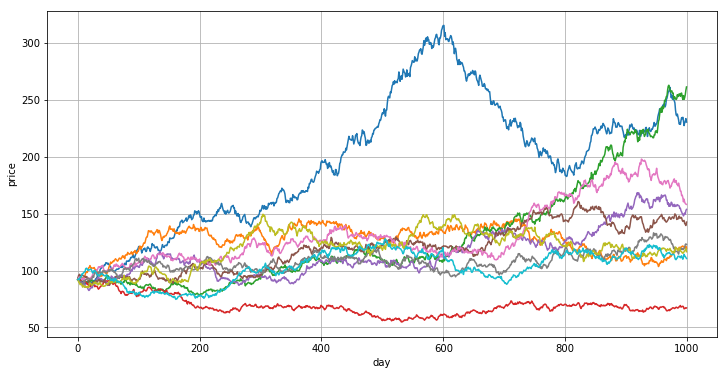

In [73]:
plt.figure(figsize=(12,6))
plt.plot(price_list)
plt.xlabel('day')
plt.ylabel('price')
plt.axis('tight')
plt.grid(True)